<a href="https://colab.research.google.com/github/Jio-Kim/ML-DL/blob/main/Naive_Bayes(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가우시안 나이브 베이즈를 활용한 붓꽃 분류

### 문제 정의
- iris 데이터를 활용해 데이터의 특징에 따라 붓꽃의 종류를 분류

In [2]:
# 필요한 라이브러리
import pandas as pd

# iris 데이터 가져오기
from sklearn.datasets import load_iris

# 데이터 분리
from sklearn.model_selection import train_test_split

# 가우시안 나이브 베이즈 이용
from sklearn.naive_bayes import GaussianNB

# 분류 성능 측정
from sklearn import metrics
from sklearn.metrics import accuracy_score

### 데이터 획득
- 사이킷런에서 제공하는 붓꽃(iris) 데이터셋 사용

In [3]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- sepal length (cm) : 꽃받침 길이

- sepal width	(cm) : 꽃받침 너비

- petal length (cm) : 꽃잎 길이

- petal width (cm) : 꽃잎 너비

### 데이터 시각화
- iris 데이터의 분포도 시각화
- 붓꽃 종류에 따른 시각화

In [5]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

In [12]:
import matplotlib.pyplot as plt

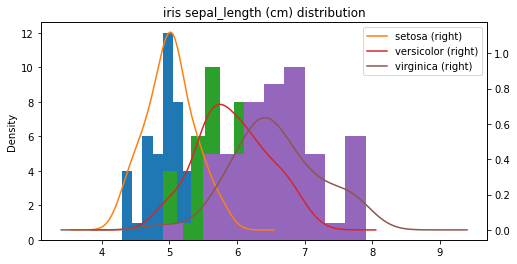

In [25]:
ax = setosa_df['sepal length (cm)'].plot(kind = 'hist')
setosa_df['sepal length (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    label = "setosa",
                                    figsize = (8,4))

ax = versicolor_df['sepal length (cm)'].plot(kind = 'hist')
versicolor_df['sepal length (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    label = 'versicolor',
                                    figsize = (8,4))

ax = virginica_df['sepal length (cm)'].plot(kind = 'hist')
virginica_df['sepal length (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    title = 'iris sepal_length (cm) distribution',
                                    label = "virginica",
                                    figsize = (8,4))
plt.legend()

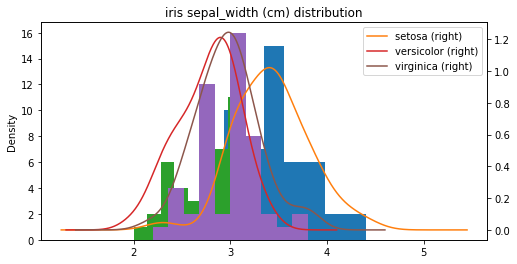

In [26]:
ax = setosa_df['sepal width (cm)'].plot(kind = 'hist')
setosa_df['sepal width (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    label = "setosa",
                                    figsize = (8,4))

ax = versicolor_df['sepal width (cm)'].plot(kind = 'hist')
versicolor_df['sepal width (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    label = 'versicolor',
                                    figsize = (8,4))

ax = virginica_df['sepal width (cm)'].plot(kind = 'hist')
virginica_df['sepal width (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    title = 'iris sepal_width (cm) distribution',
                                    label = "virginica",
                                    figsize = (8,4))
plt.legend()

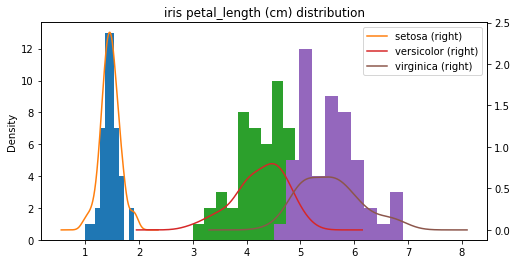

In [27]:
ax = setosa_df['petal length (cm)'].plot(kind = 'hist')
setosa_df['petal length (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    label = "setosa",
                                    figsize = (8,4))

ax = versicolor_df['petal length (cm)'].plot(kind = 'hist')
versicolor_df['petal length (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    label = 'versicolor',
                                    figsize = (8,4))

ax = virginica_df['petal length (cm)'].plot(kind = 'hist')
virginica_df['petal length (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    title = 'iris petal_length (cm) distribution',
                                    label = "virginica",
                                    figsize = (8,4))
plt.legend()

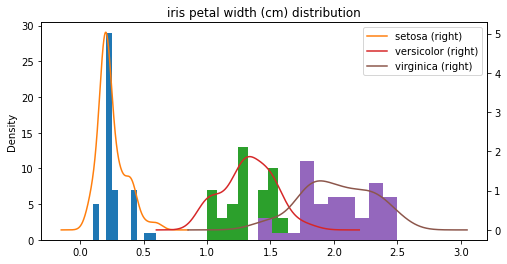

In [28]:
ax = setosa_df['petal width (cm)'].plot(kind = 'hist')
setosa_df['petal width (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    label = "setosa",
                                    figsize = (8,4))

ax = versicolor_df['petal width (cm)'].plot(kind = 'hist')
versicolor_df['petal width (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    label = 'versicolor',
                                    figsize = (8,4))

ax = virginica_df['petal width (cm)'].plot(kind = 'hist')
virginica_df['petal width (cm)'].plot(kind = 'kde',  # kde : 밀도그래프
                                    ax = ax,       # ax : 좌표계
                                    secondary_y = True, # 오른쪽에 다른 축 추가 여부
                                    title = 'iris petal width (cm) distribution',
                                    label = "virginica",
                                    figsize = (8,4))
plt.legend()

데이터에서 사용할 모든 특징들이 정규분포에 가까운 분포도를 보여 가우시안 나이브 베이즈 분류기로 분류하기에 적합한 데이터

### 데이터 다듬기

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2)

### 가우시안 나이브 베이즈 모델 학습

In [30]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### 테스트

In [32]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [33]:
# 정확도 확인
accuracy_score(y_test, predicted)

0.9666666666666667